## <div class= "alert-warning alert-block alert"> Assignment 2. Detecting fraud in credit card transactions <br> <br> Submitted by: <br> Apoorav Agnihotri<br> Gnanesh Vemuri <br> Harshil Soni <br> Soham Parekh <br> Pranay Battar<br> </div>

In [1]:
## Importing required modules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import decomposition
import warnings
warnings.filterwarnings("ignore")
# Module to standardize the data
from sklearn.preprocessing import StandardScaler
# Splitting the data set into train test parts
from sklearn.model_selection import train_test_split
## Logistic Regression.
from sklearn.linear_model import LogisticRegression
## k-Nearest Neighbors.
from sklearn.neighbors import KNeighborsClassifier
## Support Vector Machine.
from sklearn.metrics import accuracy_score

In [2]:
# Read data from an csv file and store it as a dataframe
data = pd.read_csv("creditcard.csv")

In [3]:
# Getting the column names in a dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### <div class="alert-warning alert-block-alert"> Explanation of columns in the dataset </div>
    1. Time- The time at which a credit transaction is completed <br>
    2. V1 - V28 - Various features for security reasons these are hidden <br>
    3. Amount - Money spent on a transaction
    4. Class - Type of class whether it is class 0(No Fraud) or class 1(Clean)

### <div class="alert alert-warning"> Checking the insights of a dataset </div>

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Find the number of rows and features in our dataset
data.shape

(284807, 31)

In [7]:
# Find the information about dataset
# To check the datatype of given features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Overall statistics of a dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Observations
1. We observered that column names are hidden for privacy concern
2. There are 30 features available to predict the outcome
3. All the columns are of float data type

### <div class="alert alert-warning"> Data Cleaning </div>

In [9]:
# check is there any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Drop the rows which have similar values
# This eliminates unwanted overhead on the machine learning models
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

In [11]:
##Drop NaN values if there are any
##Drop those rows which have Nan Values
data[~data.dropna().any(axis = 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


### <div class="alert alert-block alert-success"># Data Standardization</div>

In [12]:
# Intializing the standard scaler object
scaler = StandardScaler()
# We are fitting the features data and transforming the data
scaled = scaler.fit_transform(data[list(data.columns)[:-1]])

In [13]:
# stroing the standarized data to features_data frame with given column names
training_data = pd.DataFrame(scaled, columns=list(data.columns)[:-1])
# see the top 5 rows to verify data is standarized or not
training_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813


### <div class="alert alert-block alert-success"># Data Analysis</div>

In [14]:
#Intialize PCA object
pca_analysis = decomposition.PCA()

In [15]:
#Adding parameters to PCA command
pca_analysis.n_components = 2
reduced_pca_components = pca_analysis.fit_transform(data)

print("shape of pca_reduced.shape = ", reduced_pca_components.shape)

shape of pca_reduced.shape =  (283726, 2)


(283726, 3)


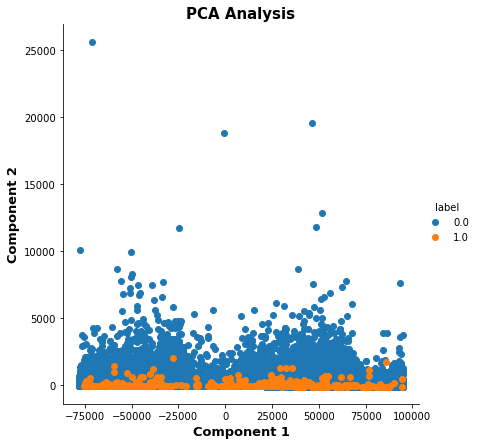

In [16]:
# Plotting the prinicipal componennt analysis of the given dataset
class_data = data['Class']

pca_data1 = np.vstack((reduced_pca_components.T, class_data)).T

print(pca_data1.shape)

# creating a new data fram which help us in ploting the result data
reduced_data = pd.DataFrame(data=pca_data1, columns=("Component 1", "Component 2", "label"))

sns.FacetGrid(reduced_data, hue="label", height=6).map(plt.scatter, 'Component 1', 'Component 2').add_legend()
plt.xlabel("Component 1",fontsize=13, fontweight='bold')
plt.ylabel("Component 2",fontsize=13, fontweight='bold')
plt.title("PCA Analysis", fontsize=15, fontweight='bold')
plt.show()
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

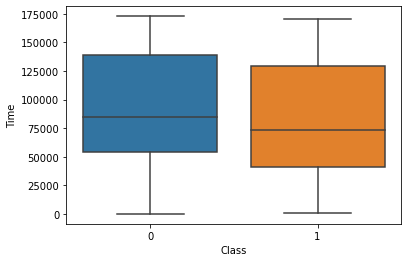

In [17]:
sns.boxplot(x = "Class", y = "Time", data = data)
plt.show()

#### By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

## 2-D ScatterPlot

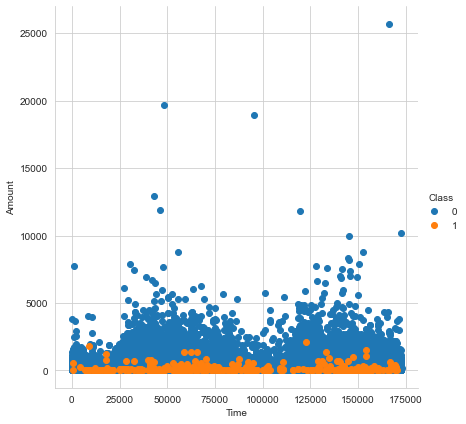

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

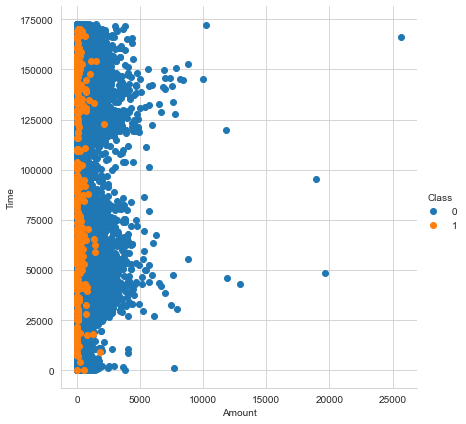

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

### 
1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

<AxesSubplot:xlabel='Time', ylabel='Density'>

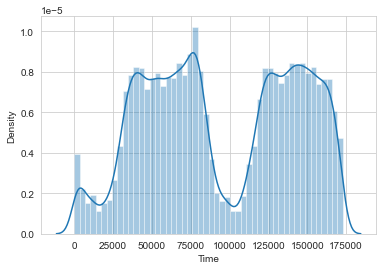

In [20]:
sns.distplot(data['Time'])

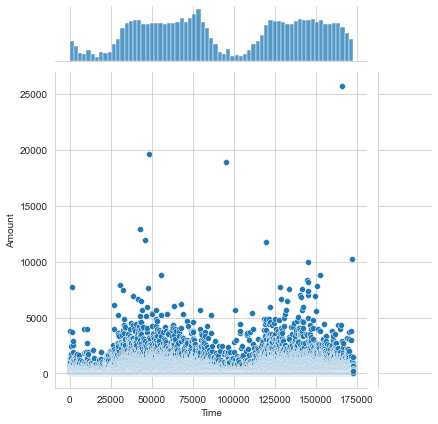

In [21]:
sns.jointplot(x="Time", y="Amount", data=data[["Time","Amount"]]);

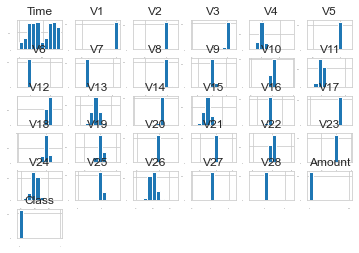

In [22]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

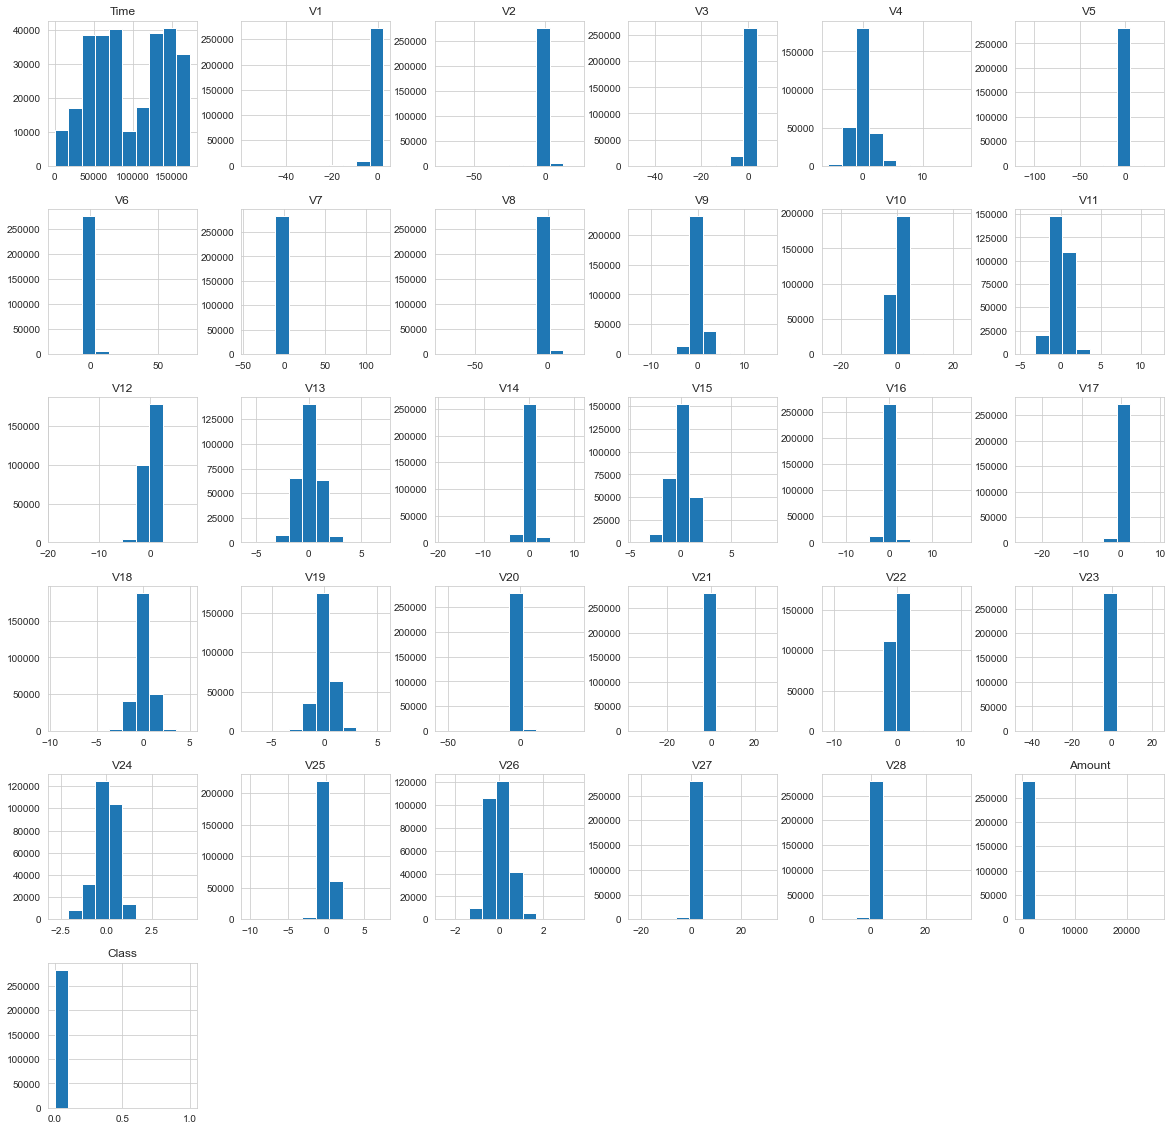

In [23]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

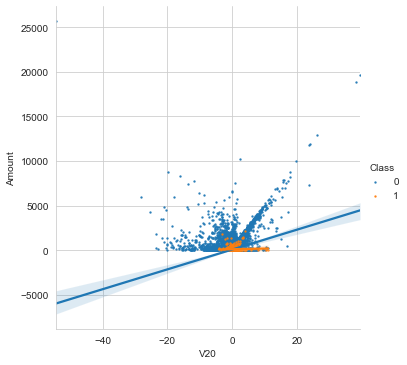

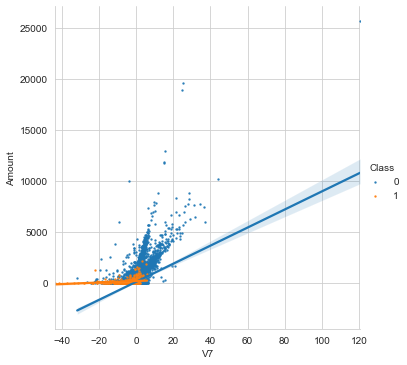

In [24]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

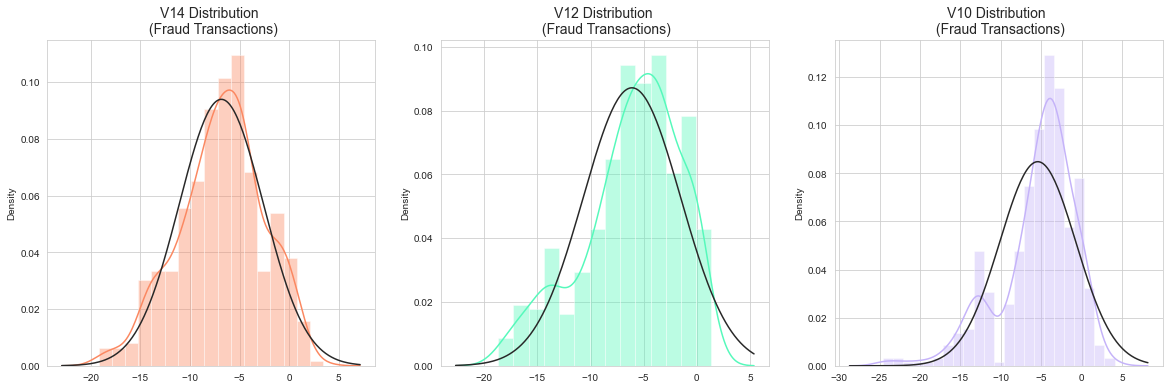

In [25]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#### The above pie chart shows ratio of number of fraudulent and non-fraudulent transactions


<AxesSubplot:title={'center':'Correlation with class'}>

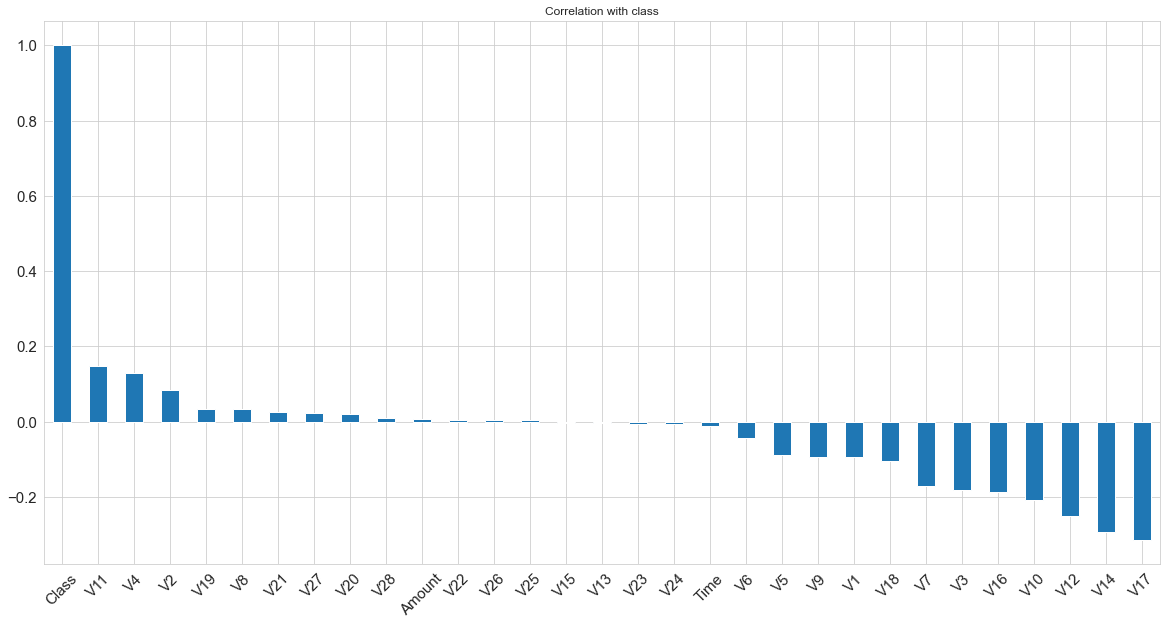

In [27]:
data.corrwith(data.Class).sort_values(ascending=False).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

### <div class="alert-warning alert-block-alert"> Classwise Feature Histogram </div>

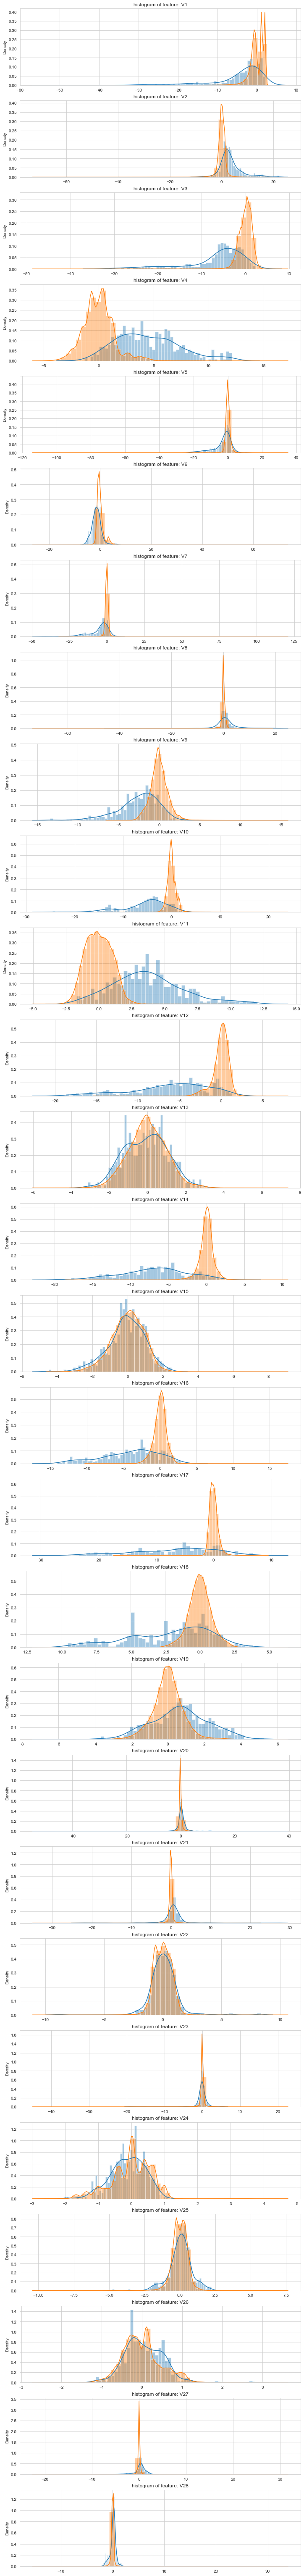

In [28]:
#Select only the anonymized features.
import matplotlib.gridspec as gridspec
features = data.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

### This shows the distribution differences of the features when comparing fraudulent transactions to normal transactions.

### <div class="alert alert-block alert-success"># Feature Importance</div>

In [29]:
# intializing correlation to store the correlation between features
correlation = data.corr().abs()

# get the correlation values
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))

# Finding the columns which have a value of 90%
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

print(columns_to_drop)

[]


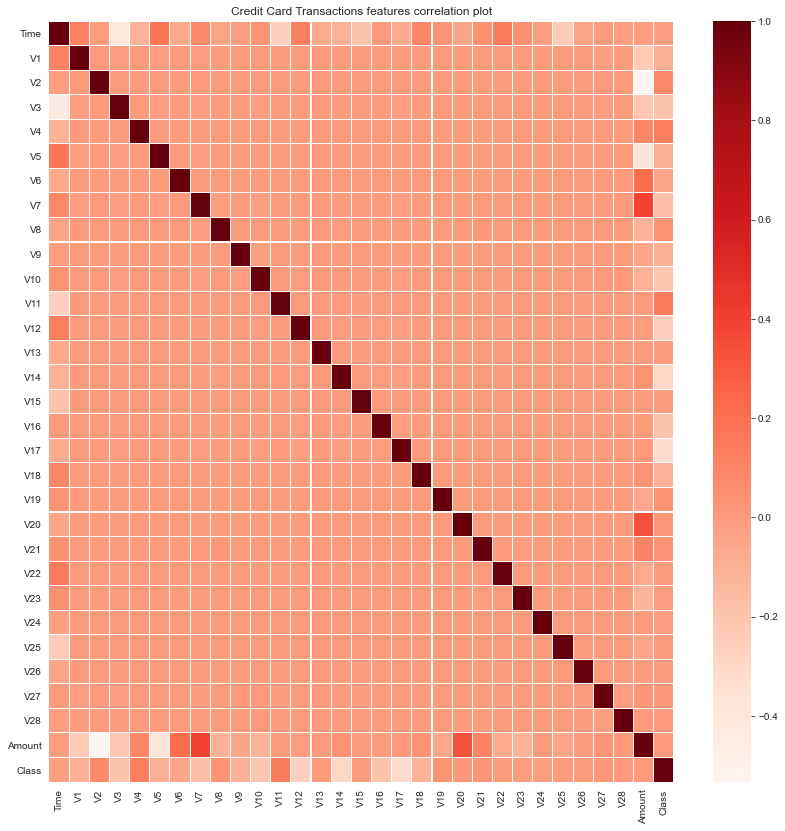

In [30]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

### <div class="alert alert-block alert-success">Data Preparation</div>

In [31]:
import sys
!{sys.executable} -m pip install imblearn

In [32]:
training_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,1.642235,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,...,1.916461,0.295375,0.154412,1.626230,-0.841382,2.757072,0.518377,2.380049,2.509507,-0.350252
283722,1.642257,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,...,0.077182,0.296413,1.275826,0.019665,-1.678330,-1.163409,-0.820253,0.168567,-0.164849,-0.254325
283723,1.642278,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,...,0.001570,0.321057,0.798074,-0.060444,1.056626,0.510299,-0.181557,0.006802,-0.082640,-0.082239
283724,1.642278,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,...,0.165259,0.366919,1.104223,-0.262138,0.203081,-1.091530,1.133734,0.270523,0.317004,-0.313391


In [33]:
output_data = data["Class"]

In [34]:
## Handling Imbalanced data
from imblearn.under_sampling import NearMiss
balancer = NearMiss()

x_balanced, y_balanced = balancer.fit_resample(training_data, output_data)

In [35]:
x_balanced.shape

(946, 30)

In [36]:
y_balanced.shape

(946,)

### <div class="alert alert-block alert-success">Building model</div>

In [37]:
import sys
!{sys.executable} -m pip install scipy

In [38]:
x_train,x_test,y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(662, 30)
(284, 30)
(662,)
(284,)


In [40]:
accuracies = {}

In [41]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train,y_train)
logistic_accuracy = logistic_classifier.score(x_test, y_test)
print("Logistic Accuracy: ", logistic_accuracy)

Logistic Accuracy:  0.9507042253521126


In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
knn_accuracy = knn_classifier.score(x_test, y_test)
print("knn accuracy", knn_accuracy)

knn accuracy 0.9577464788732394


In [43]:
from sklearn import svm

svm_classifier = svm.SVC()
svm_classifier.fit(x_train[:1000], y_train[:1000])
predictions = svm_classifier.predict(x_test)
svm_accuracy = accuracy_score(y_test,predictions)
print("svm accuracy", svm_accuracy)

svm accuracy 0.9330985915492958


In [44]:
accuracies["logistic"] = logistic_accuracy
accuracies["knn"] = knn_accuracy
accuracies["svm"] = svm_accuracy

<BarContainer object of 3 artists>

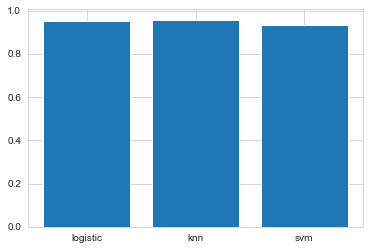

In [45]:
plt.bar(accuracies.keys(), [logistic_accuracy, knn_accuracy, svm_accuracy])

#### Observations
We can say KNN model is giving best accuracy than Logistics and SVM.